<a href="https://colab.research.google.com/github/tomosantos/rural-insurance-analysis/blob/main/analise_seguro_parana_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seguro Rural no Paraná: Uma Análise Descritiva com Dados de 2023

df = df_br[df_br['uf'] == 'MG']

df = df.reset_index(drop=True) # iniciar os índices em 0

df.head()


Importar pacotes necessários:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)             # permite a visualização de 50 colunas do dataframe
pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

# parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Leitura dos dados

Lendo a partir do *google drive*.

In [ ]:
# demora um pouco
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/analise_dados')
seg = pd.read_excel("seguro-rural-2023.xlsx")

Mounted at /content/drive


In [ ]:
df = seg.copy()    # fazer cópia do objeto seg em df
df = df.fillna(0)    # substituir nan por 0
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
df['animal'] = df['animal'].replace(['-', '...', 'X'], 0).astype(int)   # substituir variável 'animal' com '-', '...' e 'X' por 0
# simplificar os tipos de seguro da variável 'tipo'
df['tipo'] = df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'RECEITA': 'receita',
                    'PECUÁRIO': 'pecuário'})
# simplificar os nomes de eventos preponderantes da variável 'evento'
df['evento'] = df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.',
                      'DOENÇAS E PRAGAS': 'doenças'})
# categorizar os tipos de culturas (nova coluna)
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas',
                                            'Lima': 'frutas',
                                            'Graviola': 'frutas'})
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

In [ ]:
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010052117,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,43.89,0,181,4132.20,2892.60,0.70,158695.27,28004.01,0.18,11201.60,0.00,nenhum,0,0.00
1,3354004281301,4127700,Toledo,PR,Mapfre Seguros Gerais S.A.,produtividade,Milho 2ª safra,grãos,113.00,0,256,4987.80,3241.80,0.65,457942.39,87341.15,0.19,34936.46,0.00,nenhum,0,0.00
2,3717,0,São Francisco do Guaporé,RO,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,49.00,0,365,5447.00,3540.55,0.65,390390.00,25088.73,0.06,10035.49,0.00,seca,1,0.00
3,1000300003193,3530805,Mogi Mirim,SP,FairFax Brasil Seguros Corporativos S/A,produtividade,Pecuário,perenes,0.00,53,365,0.00,0.00,0.00,1448700.00,86922.00,0.06,34768.80,0.00,nenhum,0,0.00
4,02010125629,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,40.00,0,281,4326.00,2812.00,0.65,160000.00,24746.67,0.15,9898.66,0.00,nenhum,0,0.00


# Seleção de apólices de um estado do Brasil

In [ ]:
df['uf'].value_counts()

,count
uf,
PR,36754
RS,22095
SP,14912
SC,8717
MG,8170
GO,5892
MS,5481
MT,1545
ES,1356


In [ ]:
# visualizar os valores únicos da variável 'uf'
df['uf'].unique()

array(['PR', 'RO', 'SP', 'GO', 'MG', 'MT', 'RS', 'MS', 'BA', 'TO', 'MA',
       'PA', 'SE', 'RJ', 'RN', 'RR', 'SC', 'ES', 'PE', 'AL', 'PB', 'CE',
       'PI', 'DF', 0, 'AM', 'AC', 'AP'], dtype=object)

In [ ]:
# escolher um dos estados e selecionar apólices apenas desse estado
# aqui estou apenas visualizando sem salvar
df[df['uf'] == 'PR']

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010052117,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,43.89,0,181,4132.20,2892.60,0.70,158695.27,28004.01,0.18,11201.60,0.00,nenhum,0,0.00
1,3354004281301,4127700,Toledo,PR,Mapfre Seguros Gerais S.A.,produtividade,Milho 2ª safra,grãos,113.00,0,256,4987.80,3241.80,0.65,457942.39,87341.15,0.19,34936.46,0.00,nenhum,0,0.00
5,1000111007389,4114609,Marechal Cândido Rondon,PR,Sombrero Seguros S/A,produtividade,Milho 2ª safra,grãos,44.76,0,195,4797.00,3118.05,0.65,69781.96,11636.70,0.17,4654.68,0.00,nenhum,0,0.00
7,10001010052119,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,37.25,0,181,4132.20,2892.60,0.70,134686.69,23767.36,0.18,9506.94,0.00,nenhum,0,0.00
10,264396,4125704,São Miguel do Iguaçu,PR,BRASILSEG COMPANHIA DE SEGUROS,custeio,Milho 2ª safra,grãos,64.00,0,365,4800.00,3120.00,0.65,461609.74,39554.60,0.09,15821.84,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106864,1000111115697,4120358,Pranchita,PR,Sancor Seguros do Brasil S.A.,produtividade,Soja,grãos,171.65,0,210,0.00,0.00,0.00,772425.00,23713.43,0.03,4742.69,0.00,outras,1,0.00
106868,5177202312020001382,4114005,Mamborê,PR,Allianz Seguros S.A,produtividade,Soja,grãos,237.40,0,227,4361.28,3052.90,0.70,1630707.72,108207.97,0.07,21641.58,0.00,nenhum,0,0.00
106869,1000111026068,4127700,Toledo,PR,Too Seguros S.A.,produtividade,Soja,grãos,57.55,0,180,3581.40,2328.00,0.65,301446.90,22307.08,0.07,4461.42,7291.43,chuva,1,0.33
106870,3159000006401,4110508,Ipiranga,PR,Mapfre Seguros Gerais S.A.,custeio,Milho 1ª safra,grãos,8.00,0,179,8820.00,5733.00,0.65,56000.00,5323.02,0.10,2129.21,0.00,nenhum,0,0.00


In [ ]:
# salvar essas informações num dataframe
df = df[df['uf'] == 'PR']
df = df.reset_index(drop=True) # iniciar os índices em 0
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010052117,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,43.89,0,181,4132.20,2892.60,0.70,158695.27,28004.01,0.18,11201.60,0.00,nenhum,0,0.00
1,3354004281301,4127700,Toledo,PR,Mapfre Seguros Gerais S.A.,produtividade,Milho 2ª safra,grãos,113.00,0,256,4987.80,3241.80,0.65,457942.39,87341.15,0.19,34936.46,0.00,nenhum,0,0.00
2,1000111007389,4114609,Marechal Cândido Rondon,PR,Sombrero Seguros S/A,produtividade,Milho 2ª safra,grãos,44.76,0,195,4797.00,3118.05,0.65,69781.96,11636.70,0.17,4654.68,0.00,nenhum,0,0.00
3,10001010052119,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,37.25,0,181,4132.20,2892.60,0.70,134686.69,23767.36,0.18,9506.94,0.00,nenhum,0,0.00
4,264396,4125704,São Miguel do Iguaçu,PR,BRASILSEG COMPANHIA DE SEGUROS,custeio,Milho 2ª safra,grãos,64.00,0,365,4800.00,3120.00,0.65,461609.74,39554.60,0.09,15821.84,0.00,nenhum,0,0.00


In [ ]:
# quantas linhas e colunas há no novo dataframe
df.shape

(36754, 22)

# Análise descritiva

In [ ]:
# quantas apólices há de cada município - as 10 primeiras
df['nome_mun'].value_counts().head(10)

,count
nome_mun,
Assis Chateaubriand,843
Toledo,833
Londrina,568
Ubiratã,514
Cascavel,468
Nova Aurora,460
Maringá,410
Palotina,397
Marechal Cândido Rondon,395


In [ ]:
# há informações sobre apólices de quantos municípios no estado?
len(df['nome_mun'].unique())

467

In [ ]:
# resumo estatístico das variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].describe()

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
count,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00,36754.00
mean,50.00,0.07,272.07,19359.72,18165.65,0.66,254026.75,25281.86,0.11,7587.27,2958.33,0.27,0.24
std,49.60,4.90,74.08,641711.16,641738.68,0.11,294571.69,26196.25,0.04,8511.62,22580.01,0.44,2.48
min,0.00,0.00,8.00,0.00,0.00,0.00,5000.00,354.26,0.00,1.54,0.00,0.00,0.00
25%,21.43,0.00,200.00,2984.40,1950.00,0.65,95851.61,9803.12,0.08,2436.11,0.00,0.00,0.00
50%,35.00,0.00,270.00,3460.00,2268.50,0.65,165122.35,16810.69,0.10,4787.14,0.00,0.00,0.00
75%,61.20,0.00,365.00,4155.23,2852.01,0.65,309161.25,31327.07,0.15,9255.83,0.00,1.00,0.00
max,1643.84,578.00,559.00,35000000.00,35000000.00,1.00,17867650.87,526126.00,0.71,60000.00,1081200.00,1.00,142.90


O *describe* traz um resumo estatístico dos dados. Para os dados de PR em 2023:

**1 - Interpretação do resumo estatístico:**

Para a variável 'premio' (valor pago pelos segurados):

- O valor mínimo do prêmio no Paraná foi de R$354,26, indicando que uma apólice teve esse custo.

- O valor máximo foi de R$526.126,00, representando o maior valor de prêmio registrado no estado.

- O primeiro quartil (Q1) foi de R$9.803,12, indicando que 25% das apólices tinham valores de prêmio abaixo desse montante.

- A mediana (Q2) foi de R$16.810,69, ou seja, metade das apólices apresentaram prêmios abaixo desse valor e metade acima.

- O terceiro quartil (Q3) foi de R$31.327,07, com 25% das apólices tendo prêmios superiores a esse valor.

- A média foi de R$25.281,86, que, sendo maior que a mediana, sugere a presença de apólices com valores de prêmio elevados, puxando a média para cima.

Para a variável 'subvencao' (auxílio financeiro ao prêmio):

- O valor mínimo foi de 1,54, e o valor máximo chegou a R$60.000,00, evidenciando uma ampla variabilidade.

- O primeiro quartil foi de R$2.436,11, mostrando que 25% das apólices receberam uma subvenção inferior a esse valor.

- A mediana foi de R$4.787,14, indicando o valor central recebido como subvenção.

- O terceiro quartil foi de R$9.255,83, mostrando que 25% das apólices receberam valores superiores a isso.

- A média foi de R$7.587,27, próxima à mediana, o que sugere uma distribuição de valores mais equilibrada.

Para a variável 'sinistro' (apólices que registraram sinistros):

- O valor mínimo foi 0, indicando que nem todas as apólices registraram sinistros.
- O valor máximo foi 1, representando que há apólices com sinistros confirmados.
- A média foi de 0,27, indicando que 27% das apólices, em média, registraram sinistros.

Para a variável 'sinistralidade' (razão entre indenizações pagas e prêmios recebidos):

- O valor mínimo foi de 0, indicando que algumas apólices não tiveram sinistralidade.
- O valor máximo foi de 142,90, representando uma sinistralidade muito elevada em algumas apólices.
- A mediana foi de 0,00, ou seja, a maioria das apólices não apresentou sinistralidade significativa.
- A média foi de 0,24, sendo puxada por apólices com sinistralidade muito alta.


**2 - Pontos de interesse e análise detalhada:**

- A alta amplitude em valores de prêmio e subvenção indica a presença de grandes diferenças entre apólices, provavelmente relacionadas ao tamanho das propriedades ou ao nível de cobertura escolhido.
- A sinistralidade apresenta variações extremas, com algumas apólices registrando valores muito altos. Apólices com sinistralidade superior a 100% indicam que as indenizações superaram o valor dos prêmios pagos.
- A análise da variável 'area' (tamanho da área segurada) mostra que o tamanho médio é de 50 hectares, com uma amplitude entre 0 e 1.643,84 hectares. Isso reflete uma grande diversidade nas propriedades seguradas.



É possível identificar pontos de interesse nos dados. Veja abaixo:

In [ ]:
# menor valor de prêmio
df[df['premio'] == df['premio'].min()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
14112,383000004701,4119657,Pitangueiras,PR,Mapfre Seguros Gerais S.A.,custeio,Café,perenes,0.65,0,365,0.00,0.00,0.00,8047.78,354.26,0.04,141.70,0.00,seca,1,0.00


Interpretação: O menor valor de prêmio em PR foi no município de Pitangueiras (prêmio de 354,26, com subvenção de 141,70 reais). A apólice se refere a cultura pecuária e a área consta como sendo 0.65 hectares.

In [ ]:
# maior valor de prêmio
df[df['premio'] == df['premio'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
775,3726,4124608,São Carlos do Ivaí,PR,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,59.00,0,365,3762.00,2445.30,0.65,2641600.00,526126.00,0.20,60000.00,0.00,nenhum,0,0.00


In [ ]:
# um valor específico de indenização
df[df['indenizacao'] == 922699.89]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


## Gráficos

In [ ]:
# as dez culturas com mais apólices de seguro no estado em 2023
df['cultura'].value_counts().head(10)

,count
cultura,
Soja,19516
Milho 2ª safra,10500
Trigo,4676
Milho 1ª safra,731
Feijão 1ª safra,318
Pecuário,174
Uva,173
Cevada,166
Maçã,67


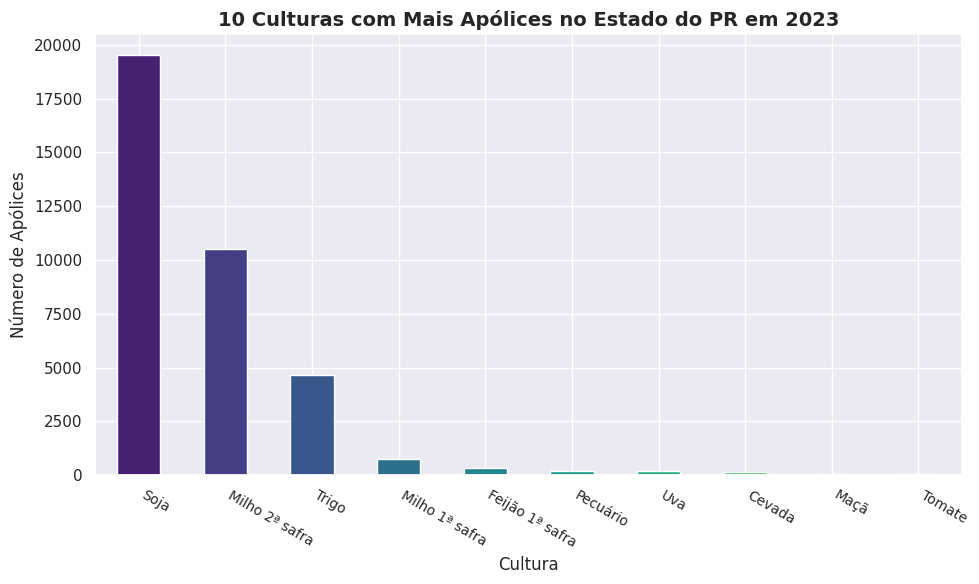

In [ ]:
# Configurando a paleta Viridis
colors = sns.color_palette("viridis", n_colors=10)

# Gráfico de colunas - 10 culturas com mais apólices no estado
ax = df['cultura'].value_counts() \
    .head(10) \
    .plot(kind='bar', color=colors, figsize=(10, 6))

# Configuração dos rótulos e título
ax.set_xlabel('Cultura', fontsize=12)
ax.set_ylabel('Número de Apólices', fontsize=12)
ax.set_title('10 Culturas com Mais Apólices no Estado do PR em 2023', fontsize=14, fontweight='bold')

# Rotação dos rótulos do eixo X (negativa)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha='left', fontsize=10)

# Ajuste do layout para melhorar o espaçamento
plt.tight_layout()

# Mostra o gráfico
plt.show()

**2 - Interpretação do gráfico de colunas com as dez culturas mais seguradas:**

As dez principais culturas seguradas no Paraná em 2023 foram, nessa ordem:

- **Soja** (com 19.516 apólices, destacando-se como a principal cultura segurada no estado).
- **Milho 2ª safra** (com 10.500 apólices, ocupando a segunda posição com um número significativo de apólices).
- **Trigo** (com 4.676 apólices, mantendo relevância no setor agrícola do estado).
- **Milho 1ª safra** (com 731 apólices, um valor consideravelmente menor que sua segunda safra).
- **Feijão 1ª safra** (com 318 apólices, representando as culturas de leguminosas).
- **Pecuário** (com 174 apólices, indicando seguro para atividades de pecuária no estado).
- **Uva** (com 173 apólices, destacando-se entre as culturas frutíferas).
- **Cevada** (com 166 apólices, sugerindo um interesse em culturas de grãos menos tradicionais).
- **Maçã** (com 67 apólices, uma cultura frutífera menos expressiva no estado).
- **Tomate** (com 57 apólices, uma cultura com baixa representatividade em seguros agrícolas).

Análise adicional:

- Soja e milho (2ª safra) dominam amplamente o mercado de apólices no Paraná, com uma concentração significativa em relação às demais culturas.
- O trigo, apesar de ficar atrás da soja e milho, possui uma quantidade expressiva de apólices, refletindo sua importância na agricultura local.
- Culturas de menor volume, como uvas, maçãs e tomates, têm números reduzidos de apólices, indicando mercados mais nichados ou com menor cobertura de seguro.
- A presença do seguro pecuário com 174 apólices destaca a diversificação das atividades seguradas, embora ainda com menor representatividade em relação às culturas agrícolas.

Realizar a soma das variáveis de forma separada por cultura para o estado todo:

In [ ]:
# total para todas as culturas
df_todas = df.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df_todas.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Abóbora,14.00,0,1000.00,1000.00,308000.00,23500.40,9400.16,381952.25,1
Algodão,22.43,0,2784.62,1814.00,170889.68,14303.47,5721.39,0.00,0
Ameixa,90.65,0,430925.00,409823.40,4269514.34,724269.19,272210.77,32938.67,3
Arroz,434.00,0,22350.00,15645.00,5274811.50,321648.82,128659.52,0.00,0
Aveia,2158.32,0,65889.00,53327.85,5772980.22,441687.72,176675.02,349359.22,12
Banana,128.53,0,650000.00,650000.00,2719400.00,403785.18,161514.07,0.00,4
Batata,842.65,0,1382417.00,1262296.05,42352614.69,2121063.03,771448.29,373802.39,17
Beterraba,4.93,0,26400.00,26400.00,130152.00,7678.97,3071.59,0.00,1
Café,525.62,0,19316.00,12555.40,5989156.43,410229.09,164091.52,57237.12,12


In [ ]:
# realizar a soma apenas para as 10 culturas com mais apólices do estado

# descobrindo as 10 culturas com mais apólices
df_cult = pd.DataFrame(df['cultura'].value_counts().head(10)).reset_index()
df_cult.columns = ['cultura', 'apolices']
# pegar as linhas no df que correspondam a apólices dessas culturas
df1 = df.merge(df_cult, how='inner')
# realizar a soma das variáveis apenas para essas culturas
df2 = df1.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df2.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Cevada,9430.12,0,721117.86,554045.61,65384277.17,5903571.70,2252403.66,657377.96,48
Feijão 1ª safra,10551.96,0,588541.60,472980.95,60028195.44,4946926.36,1908630.90,793781.79,112
Maçã,809.47,0,2146996.52,1392601.06,45108828.93,5277570.75,2104304.92,135285.84,16
Milho 1ª safra,21396.00,0,6128244.09,4583847.35,171286733.56,10889894.05,4257663.37,3190129.23,222
Milho 2ª safra,540918.02,0,48052429.04,31437232.77,2377838953.63,330454132.92,129795010.35,25068076.47,2819
Pecuário,0.00,2400,0.00,0.00,106532605.54,3558644.40,1347688.83,646991.75,47
Soja,992051.63,0,65446164.29,44377900.61,5467020700.42,442156450.53,87281152.96,62139106.75,5252
Tomate,210.42,0,3701000.00,3701000.00,15631920.00,938016.92,360309.16,245571.78,18
Trigo,248349.56,0,11042362.40,7759326.43,831528445.49,114634167.55,45472119.86,12717657.33,1225


<Figure size 1200x800 with 0 Axes>

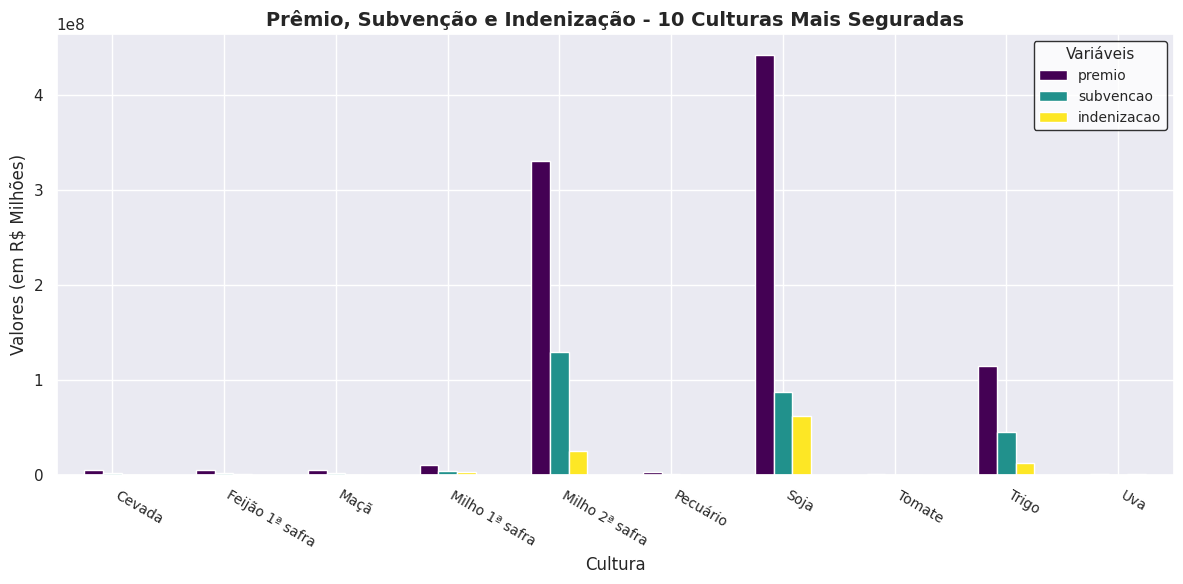

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 8))

# Gráfico com múltiplas variáveis para as 10 culturas mais seguradas
ax = df2[['premio', 'subvencao', 'indenizacao']] \
    .head(10) \
    .plot(kind='bar', colormap=plt.cm.viridis, figsize=(12, 6))

# Configuração dos rótulos e eixos
plt.xlabel('Cultura', fontsize=12)
plt.ylabel('Valores (em R$ Milhões)', fontsize=12)  # Substituindo o "le8" por algo mais compreensível
plt.title('Prêmio, Subvenção e Indenização - 10 Culturas Mais Seguradas', fontsize=14, fontweight='bold')

# Rotação dos rótulos do eixo X
plt.xticks(rotation=-30, ha='left', fontsize=10)

# Ajuste da legenda com fundo branco
legend = plt.legend(title="Variáveis", fontsize=10, title_fontsize=11)
legend.get_frame().set_facecolor('white')  # Fundo branco
legend.get_frame().set_edgecolor('black')  # Adiciona borda preta para destaque

# Ajuste de layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


**3 - Interpretação do gráfico comparativo das somas dos valores de prêmio, subvenção e indenização das dez culturas mais seguradas:**

Ao analisar as dez culturas mais seguradas no Paraná em 2023, observa-se que, para nenhuma delas, o valor total das indenizações superou o valor total dos prêmios. Esse cenário é favorável para as seguradoras, pois evita prejuízos.

Destaques:

- **Soja** apresenta o maior volume de prêmios (442.156.450,53), seguido de longe pelo milho 2ª safra (330.454.132,92). As indenizações para essas culturas também são altas, mas significativamente menores que os prêmios, garantindo a sustentabilidade para as seguradoras.
- **Trigo e milho 1ª safra** destacam-se entre os grãos com prêmios elevados (114.634.167,55 e 10.889.894,05, respectivamente), mas as indenizações permanecem bem abaixo dos valores de prêmio.
- No caso da **pecuária**, o prêmio total (3.558.644,40) também supera as indenizações (646.991,75), o que reflete uma baixa incidência de sinistros.
- **Culturas menores**, como **tomate**, **maçã**, **uva** e **cevada**, possuem valores de prêmio e indenização muito menores em comparação com grãos como soja e milho. Por exemplo, o tomate apresenta 938.016,92 em prêmios e 245.571,78 em indenizações, mostrando um equilíbrio favorável às seguradoras.

Esse comportamento geral, com prêmios superiores às indenizações, reflete um mercado de seguros rurais no Paraná onde as seguradoras conseguem manter rentabilidade mesmo em culturas de alto risco, como milho e soja. A concentração de prêmios em algumas culturas principais, especialmente soja, milho e trigo, reforça sua importância na economia agrícola do estado.

In [ ]:
df["cultura"].value_counts().sum()

36754

In [ ]:
# escolher o número de estados a destacar
n = 3
sector_graph = pd.DataFrame(df['cultura'].value_counts())
sector_graph_top = sector_graph.iloc[:n].reset_index()
sector_graph_top.columns = ['cultura', 'apolices']
sector_graph_top

,cultura,apolices
0,Soja,19516
1,Milho 2ª safra,10500
2,Trigo,4676


In [ ]:
outros = pd.DataFrame(data = {
    'cultura' : ['Outras'],
    'apolices': df['cultura'].value_counts().iloc[n:].sum()
})
outros.columns = ['cultura', 'apolices']
outros

,cultura,apolices
0,Outras,2062


In [ ]:
# juntando tudo
sector_graph = pd.concat([sector_graph_top, outros])
sector_graph.index = sector_graph.cultura
sector_graph = sector_graph.drop('cultura', axis=1)
sector_graph

,apolices
cultura,
Soja,19516
Milho 2ª safra,10500
Trigo,4676
Outras,2062


<Figure size 1000x800 with 0 Axes>

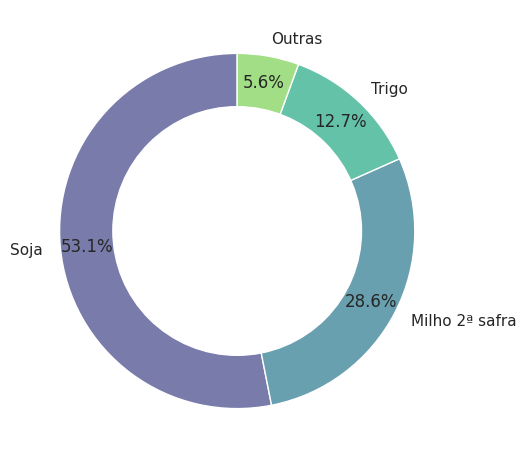

In [ ]:
from matplotlib.colors import to_rgba

# Configurando cores com uma paleta do Seaborn
base_colors = sns.color_palette("viridis", n_colors=len(sector_graph))  # Use uma paleta mais suave e visualmente atraente

# Clareia com transparência
light_colors = [to_rgba(color, alpha=0.7) for color in base_colors]
colors = light_colors

# Figura e Tamanho
plt.figure(figsize=(10, 8))

# Gráfico de pizza com ajustes visuais
sector_graph.plot(
    kind='pie',
    y="apolices",
    legend=False,
    autopct='%1.1f%%',
    colors=colors,  # Aplicando as cores
    startangle=90,  # Começa o gráfico com uma rotação para melhor alinhamento
    pctdistance=0.85  # Ajusta a posição dos percentuais
)

# Remove o eixo Y
plt.ylabel('')

# Limpa o círculo central para um efeito de rosquinha
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Alterado o tamanho para visual mais clean
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Mostra o gráfico
plt.show()


**4 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada cultura:**

O Soja (53,1%), Milho 2° safra (28,6%) e Trigo (12,7%) representam, juntas, quase 95% das apólices do estado de PR. As outras culturas possuem uma representatividade menor, tais como: feijão 1. safra, pecuário, etc.

In [ ]:
# número de apólices por tipo de cultura
df['tipo_cultura'].value_counts()

,count
tipo_cultura,
grãos,35514
leguminosas,319
frutas,301
perenes,244
hortaliças,192
sementes,166
outros,18


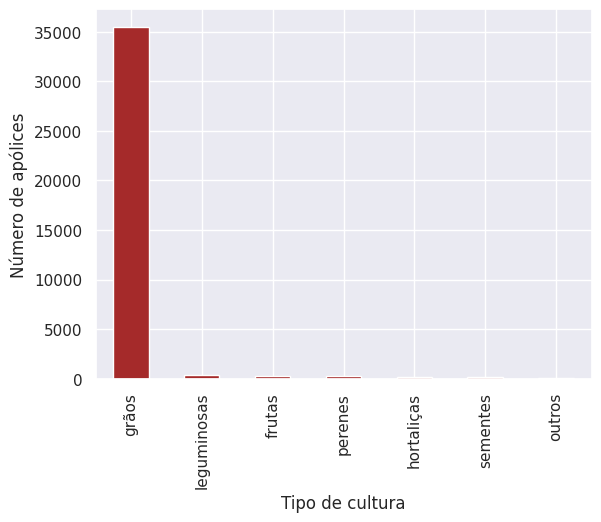

In [ ]:
# gráfico de colunas - tipos de cultura
ax = df['tipo_cultura'].value_counts().plot(kind='bar', color='brown')
ax.set_xlabel('Tipo de cultura')
ax.set_ylabel('Número de apólices');

Os grãos foram responsáveis por 35.514 apólices no estado do Paraná, dominando amplamente o mercado de seguros rurais no estado. As categorias seguintes, com números significativamente menores, são: leguminosas, com 319 apólices; frutas, com 301; perenes, com 244; hortaliças, com 192; sementes, com 166; e outros, com apenas 18 apólices.

Como já observado, no Paraná, soja, milho (2ª safra e 1ª safra) e trigo foram os principais seguros realizados em 2023, evidenciando a forte representatividade dos grãos na economia agrícola do estado.

In [ ]:
# escolher o número de estados a destacar
n = 1
sector_graph = pd.DataFrame(df['tipo_cultura'].value_counts())
sector_graph_top = sector_graph.iloc[:n].reset_index()
sector_graph_top.columns = ['tipo_cultura', 'apolices']

outros = pd.DataFrame(data = {
    'tipo_cultura' : ['outras'],
    'apolices': df['tipo_cultura'].value_counts().iloc[n:].sum()
})
outros.columns = ['tipo_cultura', 'apolices']
outros

# juntando tudo
sector_graph = pd.concat([sector_graph_top, outros])
sector_graph.index = sector_graph.tipo_cultura
sector_graph = sector_graph.drop('tipo_cultura', axis=1)
sector_graph

,apolices
tipo_cultura,
grãos,35514
outras,1240


<Figure size 1000x600 with 0 Axes>

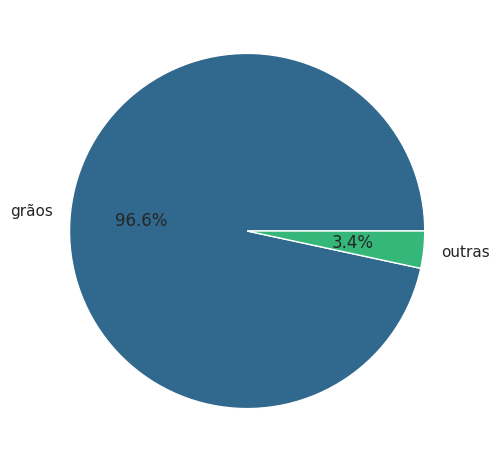

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Aplicando a paleta Viridis
colors = sns.color_palette("viridis", n_colors=len(sector_graph))

# Gráfico de pizza com ajustes
sector_graph.plot(
    kind='pie',
    y="apolices",
    autopct='%1.1f%%',
    legend=False,       # Remove a legenda
    colors=colors       # Usa a paleta Viridis
)

# Remove o texto do eixo Y
plt.ylabel('')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

**5 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada tipo de cultura:**

É a mesma informação do gráfico anterior, porém, considerando a porcentagem das apólices dentro do total. Os grãos representam 96,6% das apólices. As outras juntas representam o percentual restante.

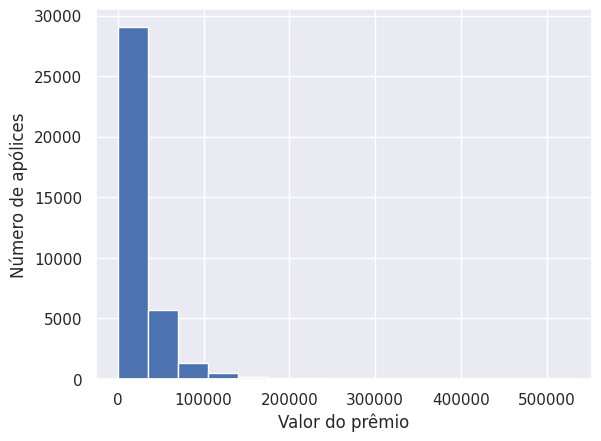

In [ ]:
# histograma dos valores de prêmio
# é possível alterar o número de colunas (bins)
ax = df['premio'].plot(kind='hist', bins=15)
ax.set_ylabel('Número de apólices')
ax.set_xlabel('Valor do prêmio');

**6 - Interpretação do histograma dos valores de prêmio**

No histograma dos valores de prêmio é possível notar que a maioria das apólices (cerca de 8.000) têm prêmios de até R\$15.000,00 (0,15x10^6).

Poderíamos pedir para ver quais são as de valores altos de prêmio:

In [ ]:
df[df['premio'] > 200000]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
60,1000111023443,4117909,Palotina,PR,Too Seguros S.A.,produtividade,Milho 2ª safra,grãos,621.03,0,180,5169.00,3360.00,0.65,2782214.40,411767.77,0.15,60000.00,0.00,nenhum,0,0.00
139,1000111023431,4115358,Maripá,PR,Too Seguros S.A.,produtividade,Milho 2ª safra,grãos,342.94,0,182,4707.60,3060.00,0.65,1399195.20,207080.90,0.15,60000.00,0.00,nenhum,0,0.00
406,02030006026,4101606,Arapoti,PR,Swiss Re Corporate Solutions Brasil S.A.,pecuário,Pecuário,perenes,0.00,1,365,0.00,0.00,0.00,2965600.00,222781.66,0.08,59999.99,0.00,nenhum,0,0.00
775,3726,4124608,São Carlos do Ivaí,PR,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,59.00,0,365,3762.00,2445.30,0.65,2641600.00,526126.00,0.20,60000.00,0.00,nenhum,0,0.00
996,02010125822,4107702,Fênix,PR,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,423.50,0,240,4448.00,2891.00,0.65,1530634.88,304596.33,0.20,59999.99,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33916,277595,4117602,Palmas,PR,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,411.00,0,366,3622.00,2354.30,0.65,3495325.50,243786.28,0.07,60000.00,0.00,nenhum,0,0.00
34115,02010131396,4114005,Mamborê,PR,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Soja,grãos,377.40,0,334,3755.00,2629.00,0.70,2480084.14,224943.62,0.09,43236.66,0.00,nenhum,0,0.00
34355,299731,4128658,Virmond,PR,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,425.00,0,366,3439.00,2235.35,0.65,3072133.13,214270.15,0.07,42854.03,0.00,nenhum,0,0.00
34656,299759,4107801,Floraí,PR,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,256.00,0,366,3000.00,1950.00,0.65,1951759.35,200055.42,0.10,40011.08,0.00,nenhum,0,0.00


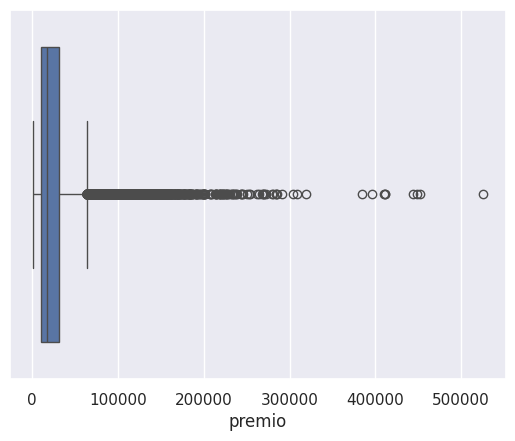

In [ ]:
# boxplot - premio
sns.boxplot(x=df['premio']);

**7 - Interpretação do boxplot dos valores de prêmio**

No boxplot da variável prêmio é possível ver a distribuição dela. A caixinha representa: primeiro, segundo e terceiro quartis que são, respectivamente, 4.389,00; 10.044,01 e 21.920,00 (tudo em reais). Os pontos à direita são os outliers, ou seja, valores discrepantes (não há outliers à esquerda porque não existem valores de prêmio negativos).

In [ ]:
# a informação presente no boxplot
df['premio'].describe()

,premio
count,36754.00
mean,25281.86
std,26196.25
min,354.26
25%,9803.12
50%,16810.69
75%,31327.07
max,526126.00


# Relação entre as variáveis

In [ ]:
# correlação entre as variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
area,1.00,-0.01,-0.01,-0.02,-0.02,0.01,0.81,0.84,-0.01,0.71,0.00,-0.01,-0.05
animal,-0.01,1.00,0.02,-0.00,-0.00,-0.08,0.07,0.00,-0.03,0.01,-0.00,0.01,-0.00
duracao,-0.01,0.02,1.00,0.03,0.03,-0.04,0.21,0.12,-0.32,0.05,0.03,0.01,0.02
prod_est,-0.02,-0.00,0.03,1.00,1.00,0.08,-0.02,-0.02,0.02,-0.01,0.00,0.01,0.01
prod_seg,-0.02,-0.00,0.03,1.00,1.00,0.08,-0.02,-0.02,0.02,-0.01,0.00,0.01,0.01
nivel_cob,0.01,-0.08,-0.04,0.08,0.08,1.00,-0.08,-0.04,-0.06,-0.04,0.01,0.02,0.01
total_seg,0.81,0.07,0.21,-0.02,-0.02,-0.08,1.00,0.81,-0.20,0.63,0.01,-0.00,-0.04
premio,0.84,0.00,0.12,-0.02,-0.02,-0.04,0.81,1.00,0.12,0.89,0.01,-0.00,-0.05
taxa,-0.01,-0.03,-0.32,0.02,0.02,-0.06,-0.20,0.12,1.00,0.30,-0.02,-0.00,-0.03
subvencao,0.71,0.01,0.05,-0.01,-0.01,-0.04,0.63,0.89,0.30,1.00,0.00,-0.00,-0.05


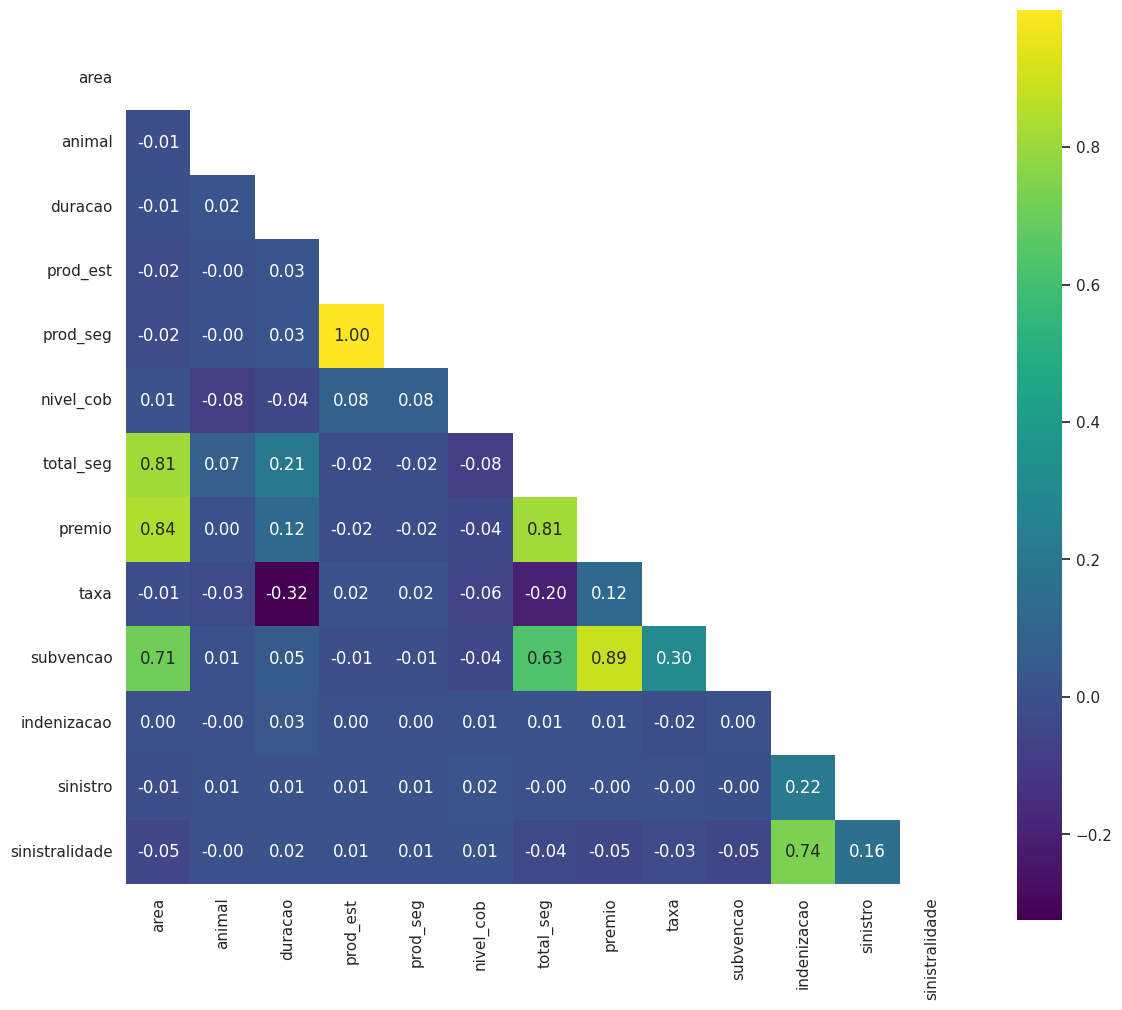

In [ ]:
# Configurando o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 12))  # Tamanho ajustado para melhor legibilidade

# Calculando a matriz de correlação
r = df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)

# Criando uma máscara para a parte superior
mask = np.zeros_like(r, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Criando o heatmap com ajustes
sns.heatmap(
    r,
    cmap="viridis",         # Mantém a paleta Viridis
    annot=True,             # Mostra os valores
    fmt=".2f",              # Formata os valores com 2 casas decimais
    mask=mask,              # Aplica a máscara para esconder a parte superior
    ax=ax,
    square=True,            # Torna as células quadradas
    cbar_kws={'shrink': 0.8}  # Reduz o tamanho da barra de cores
)

# Remove o fundo cinza padrão
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

**8 - Interpretação das correlações entre as variáveis:**

As maiores correlações positivas são:

- 1,00: prod_seg e prod_est (correlação positiva perfeita, pois ambos representam medidas diretamente relacionadas).
- 0,89: subvencao e premio (correlação positiva muito alta, indicando que a subvenção é fortemente proporcional ao valor do prêmio).
- 0,84: premio e area (correlação positiva alta, mostrando que áreas maiores tendem a estar associadas a prêmios mais altos).
- 0,81: total_seg e area (correlação positiva alta, evidenciando que áreas maiores resultam em totais segurados mais altos).
- 0,81: premio e total_seg (correlação positiva alta, sugerindo que prêmios maiores acompanham totais segurados maiores).
- 0,74: sinistralidade e indenizacao (correlação positiva alta, indicando que, à medida que as indenizações aumentam, a sinistralidade também tende a crescer).

A maior correlação negativa é:

- -0,32: taxa e duracao (uma correlação moderadamente negativa, sugerindo que apólices com maior duração podem estar associadas a taxas mais baixas).

Outros destaques:

- A correlação positiva entre area e total_seg reflete que propriedades maiores tendem a segurar valores mais altos.
- A correlação entre premio e subvencao mostra a dependência direta entre o valor subvencionado e o prêmio total.
- A correlação entre sinistralidade e indenizacao reforça a relação entre o aumento da sinistralidade e o montante pago em indenizações.

Nota:

- Correlações próximas de 1 ou -1 indicam associações fortes, mas correlação não implica causalidade. Fatores externos podem influenciar essas relações, e análises adicionais seriam necessárias para compreender os mecanismos subjacentes.

Diagramas de dispersão: vamos fazer alguns diagramas de dispersão para observar como os pares de variáveis se comportam.

Pares de variáveis que tiveram correlação alta:

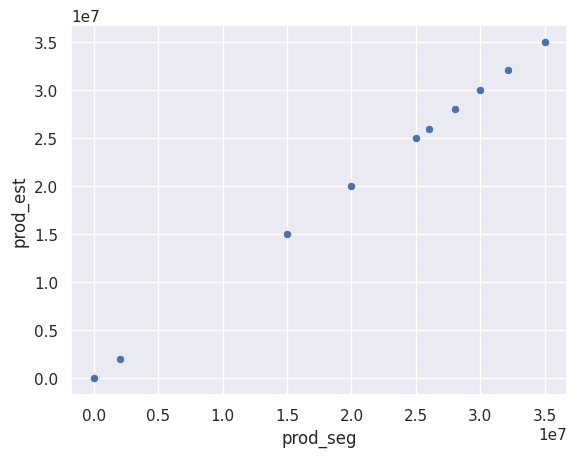

In [ ]:
# diagrama de dispersão entre prod_seg e prod_est
ax = sns.scatterplot(x='prod_seg',
                y='prod_est',
                data=df)
ax.set_title('')
plt.show()

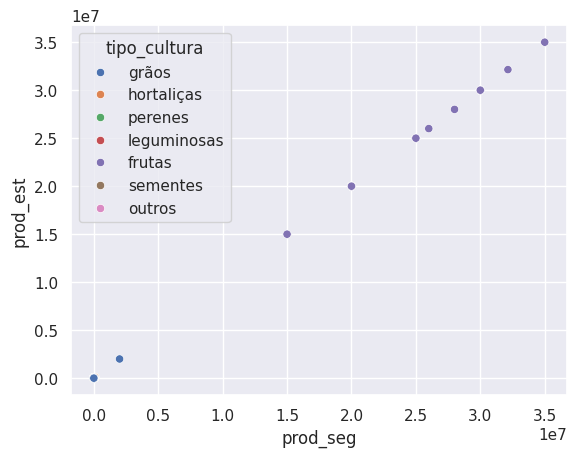

In [ ]:
# diagrama de dispersão entre prod_seg e prod_est
# tipo_cultura nas cores
ax = sns.scatterplot(x='prod_seg',
                y='prod_est',
                hue='tipo_cultura',
                data=df)
ax.set_title('')
plt.show()

In [ ]:
df[df['prod_est'] == df['prod_est'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
13774,1000111213577,4115309,Mariópolis,PR,Essor Seguros S.A.,produtividade,Uva,frutas,0.51,0,361,35000000.00,35000000.00,1.00,26775.00,4072.50,0.15,1629.00,0.00,geada,1,0.00


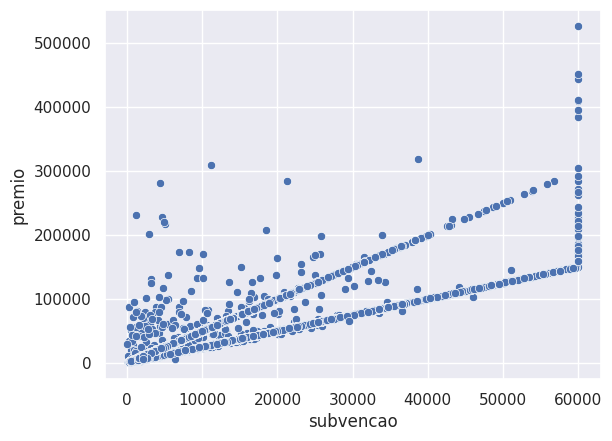

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
ax = sns.scatterplot(x='subvencao',
                y='premio',
                data=df)
ax.set_title('')
plt.show()

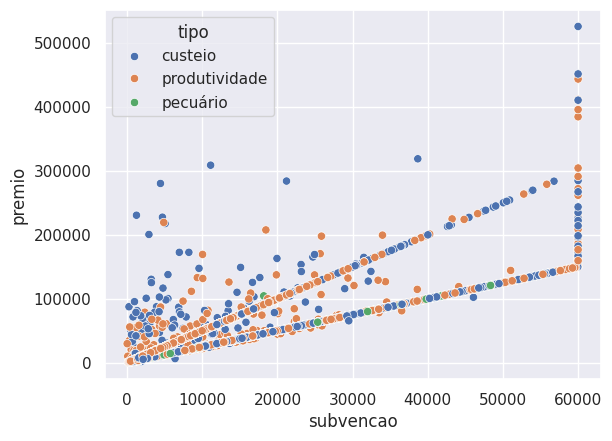

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
# mais tipo de seguro nas cores
ax = sns.scatterplot(x='subvencao',
                y='premio',
                hue='tipo',
                data=df)
ax.set_title('')
plt.show()

Pares de variáveis que tiveram correlação baixa:

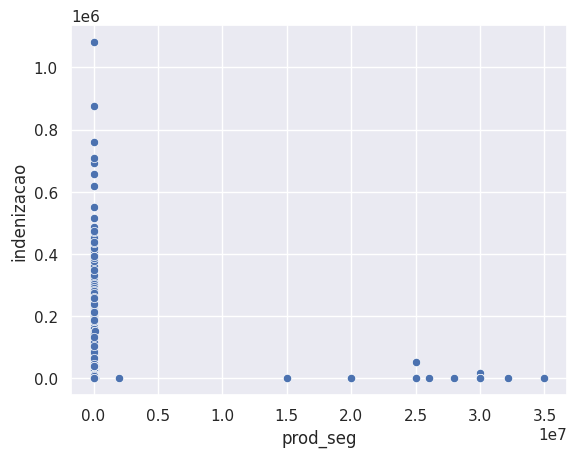

In [ ]:
ax = sns.scatterplot(x='prod_seg',
                y='indenizacao',
                data=df)
ax.set_title('')
plt.show()